In [1]:
#het importeren van de benodigheden
import sqlite3
import pandas as pd
from sqlalchemy import create_engine, text
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## Sprint 2.1:

# Beschrijving van de data

We hebben de tabellen Country, League, Match, Player, Player_Attributes, Team en Team_Attributes

In de Country tabel staan de landen die gebruikt worden met daar bij een land id.

In de League tabel staan de verschillende leagues die gebruikt worden met daarbij het bijbehorende land, ook staat in de tabel een land id en een league id.

In de Match tabel staat de meeste informatie, je hebt hier staan wat de uitslag is, welke positie een speler heeft op het veld via een X en Y grid, Wie spelers waren via speler ID, er zijn een paar kolommen (goal, shoton, shotoff, foulcommit, card, cross, corner, possession) waar informatie staat over de desbetreffende gegevens, die informatie in deze kolommen is heel onduidelijk en we moeten nog kijken hoe we dit gaan toepassen. Ook heb je voor een paar gokwebsites de odds voor de wedstrijd, deze odds zijn van voordat de wedstrijd begon (Home odds, gelijkspel odds en Away odds). Als laatst hebben we een id van de wedstrijd, een lands id, een league id, het seizoen dat het gebeurde, de stage waar het gebeurde (speelweek) en wanneer het gebeurde. Ook hebben we nog een match_api_id, een home_team_api_id en een away_team_api_id.

In de Player tabel staan de verschillende spelers met daarbij hun geboortedatum, lengte en gewicht. Ook hebben ze een ID, player_api_id en een player_fifa_api_id

In de Player_Attributes tabel staan per spelers hun fifa ratings per verschillend onderdeel, denk bijvoorbeeld aan rating, potentie, shooting en dribbling. Ook staan hoeveel moeite ze stoppen in aanvallen en verdedigen in fifa en wat hun favoriete voet is om mee te spelen. Als laatste hebben ze ook nog een ID, een player_fifa_api_id, een player_api_id en de datum dat deze gegevens opgenomen zijn.

In de Team tabel staat een id, een team_api_id, een team_fifa_api_id, een team naam en een afkorting van de team naam.

In de Team_Attributes tabel een id, een team_fifa_api_id, een team_api_id en de datum dat de gegevens afgenomen zijn. Ook staat erin hoe het team speelt in fifa, denk bijvoorbeeld aan hoe wijd ze verdedigen of hoeveel ze hun kansen maken via passen en met wat voor passen ze gebruiken.



In [2]:
#Het laden van de dataframes voor sql
cnx = sqlite3.connect("database.sqlite")

league_df = pd.read_sql_query("SELECT * FROM League", cnx)
match_df = pd.read_sql_query("SELECT * FROM Match", cnx)
team_df = pd.read_sql_query("SELECT * FROM Team", cnx)

Deze 3 cellen hieronder zijn code die we van het vak Data II gekopiëerd hebben zodat we SQL kunnen gebruiken in python

In [3]:
def show_query(query):
    """
       Deze functie print de output van je SQL query uit.
       Parameters:
                  query = Je SQL query.
                          Zorg ervoor dat deze parameter een string is.
    """
    query_output = engine.execute(query).fetchall()
    column_names = engine.execute(query)._metadata.keys
    return pd.DataFrame(query_output, columns = column_names)

In [4]:
def df_to_database(df, name):
    """
       Deze functie maakt een database van een dataframe.
       Parameters:
                  df  = de dataframe waarvan je een database tabel wil maken.
                         
                  name = De naam die je de database wil geven.
                         Zorg ervoor dat deze parameter een string is.
    """
    df.to_sql(name, con=engine)
    
    display(df)


In [5]:
engine = create_engine('sqlite://', echo=False)


In [6]:
#Hier worden de databases gemaakt zodat we die via sql kunnen gebruiken
df_to_database(team_df, 'team')
df_to_database(league_df, 'league')
df_to_database(match_df, 'match')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
query1 = """

SELECT *
  FROM team
  WHERE team_long_name LIKE '%Fey%'

                  
"""

show_query(query1)

#team id is 167, team_api_id is 10235 en team_fifa_api_id is 246
#Team naam is Feyenoord en afkorting is FEY

,index,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,167,26558,10235,246.0,Feyenoord,FEY


In [8]:
query2 = """

SELECT le.name,le.id
FROM team AS te
INNER JOIN match as ma
ON te.team_api_id = ma.home_team_api_id
INNER JOIN league as le
ON le.country_id = ma.country_id
WHERE te.team_api_id = 10235
LIMIT 1


"""

show_query(query2)

#De league is 'Netherlands Eredivisie' waarvan het id 13274 is

,name,id
0,Netherlands Eredivisie,13274


In [9]:
query3 = """

SELECT ma1.*, te.team_long_name AS Home_team_name, te2.team_long_name AS Away_team_name
FROM match AS ma1
INNER JOIN team as te
ON te.team_api_id = ma1.home_team_api_id
INNER JOIN team AS te2
ON te2.team_api_id = ma1.away_team_api_id
WHERE te.team_api_id = 10235 OR te2.team_api_id = 10235
"""

show_query(query3)
#Je ziet hier alle wedstrijden van feyenoord die in de database staan

,index,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Home_team_name,Away_team_name
0,13278,13279,13274,13274,2008/2009,1,2008-08-31 00:00:00,508307,9791,10235,...,3.4,1.70,4.00,3.4,1.80,4.33,3.3,1.73,Heracles Almelo,Feyenoord
1,13289,13290,13274,13274,2008/2009,10,2008-11-09 00:00:00,523738,10235,9908,...,3.4,4.35,1.67,3.5,4.75,1.67,3.5,4.75,Feyenoord,FC Utrecht
2,13299,13300,13274,13274,2008/2009,11,2008-11-16 00:00:00,523748,8611,10235,...,3.5,3.50,2.00,3.3,3.40,1.95,3.3,3.50,FC Twente,Feyenoord
3,13306,13307,13274,13274,2008/2009,12,2008-11-23 00:00:00,523755,10235,10217,...,4.5,8.00,1.35,4.5,7.50,1.33,4.5,8.00,Feyenoord,ADO Den Haag
4,13314,13315,13274,13274,2008/2009,13,2008-11-30 00:00:00,523763,8277,10235,...,3.4,2.20,2.85,3.3,2.30,2.88,3.3,2.20,Vitesse,Feyenoord
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,15682,15683,13274,13274,2015/2016,5,2015-09-13 00:00:00,1983314,10235,8525,...,5.0,7.50,NaN,NaN,NaN,NaN,NaN,NaN,Feyenoord,Willem II
268,15690,15691,13274,13274,2015/2016,6,2015-09-20 00:00:00,1983322,9803,10235,...,4.0,1.73,NaN,NaN,NaN,NaN,NaN,NaN,Roda JC Kerkrade,Feyenoord
269,15700,15701,13274,13274,2015/2016,7,2015-09-27 00:00:00,1983332,10235,6413,...,5.0,7.50,NaN,NaN,NaN,NaN,NaN,NaN,Feyenoord,PEC Zwolle
270,15708,15709,13274,13274,2015/2016,8,2015-10-04 00:00:00,1983340,8526,10235,...,5.0,1.40,NaN,NaN,NaN,NaN,NaN,NaN,De Graafschap,Feyenoord


In [10]:
query4 = """

SELECT ma1.*, te.team_long_name AS Home_team_name, te2.team_long_name AS Away_team_name
FROM match AS ma1
INNER JOIN team as te
ON te.team_api_id = ma1.home_team_api_id
INNER JOIN team AS te2
ON te2.team_api_id = ma1.away_team_api_id
WHERE (te.team_api_id = 10235 OR te2.team_api_id = 10235) AND ma1.season= '2008/2009'
GROUP BY Home_team_name

"""

show_query(query4)
#Je ziet hier alle wedstrijden van feyenoord die in de database staan

,index,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Home_team_name,Away_team_name
0,13503,13504,13274,13274,2008/2009,32,2009-04-26 00:00:00,523934,10217,10235,...,3.40,2.10,3.00,3.30,2.15,3.00,3.30,2.20,ADO Den Haag,Feyenoord
1,13458,13459,13274,13274,2008/2009,28,2009-03-22 00:00:00,523898,10229,10235,...,3.60,7.00,1.50,3.75,6.50,1.44,3.75,7.00,AZ,Feyenoord
2,13413,13414,13274,13274,2008/2009,23,2009-02-15 00:00:00,523853,8593,10235,...,3.60,6.00,1.57,3.60,5.50,1.53,3.75,5.50,Ajax,Feyenoord
3,13424,13425,13274,13274,2008/2009,24,2009-02-22 00:00:00,523864,8526,10235,...,3.30,2.00,3.50,3.25,2.00,3.30,3.25,2.05,De Graafschap,Feyenoord
4,13533,13534,13274,13274,2008/2009,4,2008-09-28 00:00:00,523685,8674,10235,...,3.30,2.50,2.55,3.30,2.45,2.50,3.30,2.50,FC Groningen,Feyenoord
5,13299,13300,13274,13274,2008/2009,11,2008-11-16 00:00:00,523748,8611,10235,...,3.50,3.50,2.00,3.30,3.40,1.95,3.30,3.50,FC Twente,Feyenoord
6,13509,13510,13274,13274,2008/2009,33,2009-05-03 00:00:00,523940,9908,10235,...,3.25,2.40,2.60,3.25,2.40,2.70,3.25,2.38,FC Utrecht,Feyenoord
7,13470,13471,13274,13274,2008/2009,29,2009-04-05 00:00:00,523910,6601,10235,...,3.30,1.95,3.60,3.35,1.90,3.60,3.30,1.91,FC Volendam,Feyenoord
8,13289,13290,13274,13274,2008/2009,10,2008-11-09 00:00:00,523738,10235,9908,...,3.40,4.35,1.67,3.50,4.75,1.67,3.50,4.75,Feyenoord,FC Utrecht
9,13278,13279,13274,13274,2008/2009,1,2008-08-31 00:00:00,508307,9791,10235,...,3.40,1.70,4.00,3.40,1.80,4.33,3.30,1.73,Heracles Almelo,Feyenoord


# Sprint 2.2:

Wij hebben gekozen om met classes te werken omdat dat ons het handigste leek in verband met de opdracht

In [11]:
class FootballData:
    """
    Class to get and describe the data from kaggle soccer dataset
    """
    def __init__(self, data_path):
        """
        Initialize data from kaggle to use in other methods
        """
        self.cnx = sqlite3.connect(data_path)

        self.country_df = pd.read_sql_query("SELECT * FROM Country", self.cnx)
        self.league_df = pd.read_sql_query("SELECT * FROM League", self.cnx)
        self.match_df = pd.read_sql_query("SELECT * FROM Match", self.cnx)
        self.player_df = pd.read_sql_query("SELECT * FROM Player", self.cnx)
        self.player_att_df = pd.read_sql_query("SELECT * FROM Player_Attributes", self.cnx)
        self.team_df = pd.read_sql_query("SELECT * FROM Team", self.cnx)
        self.team_att_df = pd.read_sql_query("SELECT * FROM Team_Attributes", self.cnx)
        
    def get_league_season_data(self, league, season):
        """
        Return all match data from a competition in a season
        """
        # Get the data from the dataframe

        league_api_id = self.league_df.loc[(self.league_df['name'] == league)]['id'].values[0]
        
        league_matches = self.match_df.loc[(self.match_df['league_id'] == league_api_id) &  
                                           (self.match_df['season'] == season)].copy()
        # Add Home and away column for points to able to differentiate between games played home and games played away

        
        league_matches["points_for_home"] = np.where(league_matches['home_team_goal'] > league_matches['away_team_goal'], 3,
                                             np.where(league_matches['home_team_goal'] == league_matches['away_team_goal'], 1, 0))
        league_matches["points_for_away"] = np.where(league_matches['home_team_goal'] < league_matches['away_team_goal'], 3,
                                             np.where(league_matches['home_team_goal'] == league_matches['away_team_goal'], 1, 0))
        # Split the the dataframe in to home_games and away_games so we can like it to the correct ID's
        
        home_games = league_matches.groupby('home_team_api_id').sum().sort_values("points_for_home")
        away_games = league_matches.groupby('away_team_api_id').sum().sort_values("points_for_away")
        
        # Making our eventual 'Ranglijst' dataframe
        ranglijst = pd.DataFrame()
        
        # Adding the columns to the 'Ranglijst' dataframe
        ranglijst['Team_id']= self.match_df.loc[(self.match_df['league_id'] == league_api_id) &  (self.match_df['season'] == season), 'home_team_api_id'].unique()
        ranglijst['Team_Name'] = pd.merge(ranglijst, self.team_df, left_on =ranglijst['Team_id'], right_on = self.team_df['team_api_id'])['team_long_name']
        ranglijst['Doelpunten_voor'] = pd.merge(ranglijst, home_games, left_on =ranglijst['Team_id'], right_index=True)['home_team_goal'] + pd.merge(ranglijst, away_games, left_on =ranglijst['Team_id'], right_index=True)['away_team_goal']
        ranglijst['Doelpunten_tegen'] = pd.merge(ranglijst, home_games, left_on =ranglijst['Team_id'], right_index=True)['away_team_goal'] + pd.merge(ranglijst, away_games, left_on =ranglijst['Team_id'], right_index=True)['home_team_goal']
        ranglijst['Doelpunten_saldo'] = ranglijst['Doelpunten_voor'] - ranglijst['Doelpunten_tegen']
        ranglijst['Totale_punten'] = pd.merge(ranglijst, home_games, left_on =ranglijst['Team_id'], right_index=True)['points_for_home'] + pd.merge(ranglijst, away_games, left_on =ranglijst['Team_id'], right_index=True)['points_for_away']
        
        # Sorting the 'Ranglijst' dataframe and changing it's index (to make it look more like an actual ranking)
        ranglijst = ranglijst.sort_values(by=['Totale_punten', 'Doelpunten_saldo'], ascending=False, ignore_index=True)
        ranglijst.index= ranglijst.index +1


        return ranglijst
        
    
    def get_team_season_data(self, team, season):
        """
        Return all match data from a team in a particular season
        """
        # Get the data from the dataframe
        team_api_id = self.team_df.loc[(self.team_df['team_long_name'] == team)]['team_api_id'].values[0]
        team_matches = self.match_df.loc[((self.match_df['home_team_api_id'] == team_api_id) | 
                                          (self.match_df['away_team_api_id'] == team_api_id))
                                         & (self.match_df['season'] == season)].copy()
        
        # Add Home and away column to able to differentiate between games played home and games played away
        team_matches["home/away"] = np.where(team_matches['home_team_api_id'] == team_api_id, "home", "away")

        team_matches["punten"] = np.where(((team_matches['home_team_goal'] > team_matches['away_team_goal']) & (team_matches["home/away"] == "home")) |
                                          ((team_matches['home_team_goal'] < team_matches['away_team_goal']) & (team_matches["home/away"] == "away")), 3, 
                                          np.where(team_matches['home_team_goal'] == team_matches['away_team_goal'], 1, 0))
        
        return team_matches
    
        
        
        
        

In [87]:
class Analyse:
    def __init__(self, data, ranglijst):
        self.data = data
        self.ranglijst = ranglijst
        
    def get_att_corr(self, team_att_df, start_date_season, end_date_season):
        team_att_df["date"] = pd.to_datetime(team_att_df["date"])
        
        value_replacements = [[1, 0, 2], 
                              [0, 1, 2], 
                              [1, 0, 2], 
                              [0, 1], 
                              [1, 2, 0], 
                              [0, 2, 1], 
                              [1, 2, 0], 
                              [0, 1],
                              [0, 1, 2], 
                              [0, 1, 2], 
                              [1, 0, 2], 
                              [0, 1]]
        
        for value, cat_col in enumerate(team_att_df.filter(regex="Class$", axis=1)):
            new_col = cat_col + "Nr"
            team_att_df[new_col] = team_att_df[cat_col].replace(team_att_df[cat_col].dropna().unique(), value_replacements[value])
        
        team_att_df = team_att_df.loc[(team_att_df["date"] > start_date_season) & 
                                      (team_att_df["date"] <= end_date_season)].copy()
        analisis_df = self.ranglijst.merge(team_att_df, how='inner', left_on='Team_id', right_on='team_api_id')
        correlations = {}
        
        for att in analisis_df.select_dtypes(include=np.number).columns\
        .difference(["id", "Team_id", "team_fifa_api_id", "team_api_id", "date", 
                     "Totale_punten", "Doelpunten_saldo", "Doelpunten_voor", "Doelpunten_tegen"]):
            if len(analisis_df[att].dropna().unique()) != 1:
                correlations[att] = analisis_df["Totale_punten"].corr(analisis_df[att])
        
        
        correlations_df = pd.DataFrame(correlations.items(), columns=['Labels', 'Values']).set_index('Labels').sort_values('Values', ascending=False)
        fig = plt.figure(figsize=(5, 20))
        fig = sns.heatmap(correlations_df, annot=True)
        
    def describe_team_season_data(self):
        """
        Print a description of the team/season self.data
        """  
        home_win_perc = round(len(self.data["punten"].loc[(self.data["punten"] == 3) & (self.data["home/away"] == "home")]) / len(self.data.loc[self.data["home/away"] == "home"]) * 100, 2)
        home_draw_perc = round(len(self.data["punten"].loc[(self.data["punten"] == 1) & (self.data["home/away"] == "home")]) / len(self.data.loc[self.data["home/away"] == "home"]) * 100, 2)
        home_loss_perc = round(len(self.data["punten"].loc[(self.data["punten"] == 0) & (self.data["home/away"] == "home")]) / len(self.data.loc[self.data["home/away"] == "home"]) * 100, 2)
        
        away_win_perc = round(len(self.data["punten"].loc[(self.data["punten"] == 3) & (self.data["home/away"] == "away")]) / len(self.data["punten"].loc[self.data["home/away"] == "away"]) * 100, 2)
        away_draw_perc = round(len(self.data["punten"].loc[(self.data["punten"] == 1) & (self.data["home/away"] == "away")]) / len(self.data["punten"].loc[self.data["home/away"] == "away"]) * 100, 2)
        away_loss_perc = round(len(self.data["punten"].loc[(self.data["punten"] == 0) & (self.data["home/away"] == "away")]) / len(self.data["punten"].loc[self.data["home/away"] == "away"]) * 100, 2)
        
        
        print(f"Aantal wedstrijden: {str(len(self.data))} \n\
                Aantal punten: {str(self.data['punten'].sum())} \n\
                Gemiddelde punten per wedstrijd: {str(round(self.data['punten'].mean(), 2))} \n\n\
                Win thuis percentage: {str(home_win_perc)}% \n\
                Gelijk thuis percentage: {str(home_draw_perc)}% \n\
                Verlies thuis percentage: {str(home_loss_perc)}% \n\n\
                Win uit percentage: {str(away_win_perc)}% \n\
                Gelijk uit percentage: {str(away_draw_perc)}% \n\
                Verlies uit percentage: {str(away_loss_perc)}%")
        

In [88]:
# Initialiseer objecten
fd = FootballData("database.sqlite")
analyse = Analyse(fd.get_team_season_data("Feyenoord", "2013/2014"), 
                  fd.get_league_season_data('Netherlands Eredivisie','2013/2014'))
#het weergeven van de benodigde informatie van ons team in het desbetreffende seizoen
analyse.describe_team_season_data()
#het weergeven van de ranglijst van ons desbetreffende seizoen en competitie
fd.get_league_season_data('Netherlands Eredivisie','2013/2014')

Aantal wedstrijden: 34 
                Aantal punten: 67 
                Gemiddelde punten per wedstrijd: 1.97 

                Win thuis percentage: 70.59% 
                Gelijk thuis percentage: 11.76% 
                Verlies thuis percentage: 17.65% 

                Win uit percentage: 47.06% 
                Gelijk uit percentage: 29.41% 
                Verlies uit percentage: 23.53%


,Team_id,Team_Name,Doelpunten_voor,Doelpunten_tegen,Doelpunten_saldo,Totale_punten
1,8593,Ajax,69,28,41,71
2,10235,Feyenoord,76,40,36,67
3,8611,FC Twente,72,37,35,63
4,8640,PSV,60,45,15,59
5,10228,SC Heerenveen,72,51,21,57
6,8277,Vitesse,65,49,16,55
7,8674,FC Groningen,57,53,4,51
8,10229,AZ,54,50,4,47
9,10217,ADO Den Haag,45,64,-19,43
10,9908,FC Utrecht,46,65,-19,41


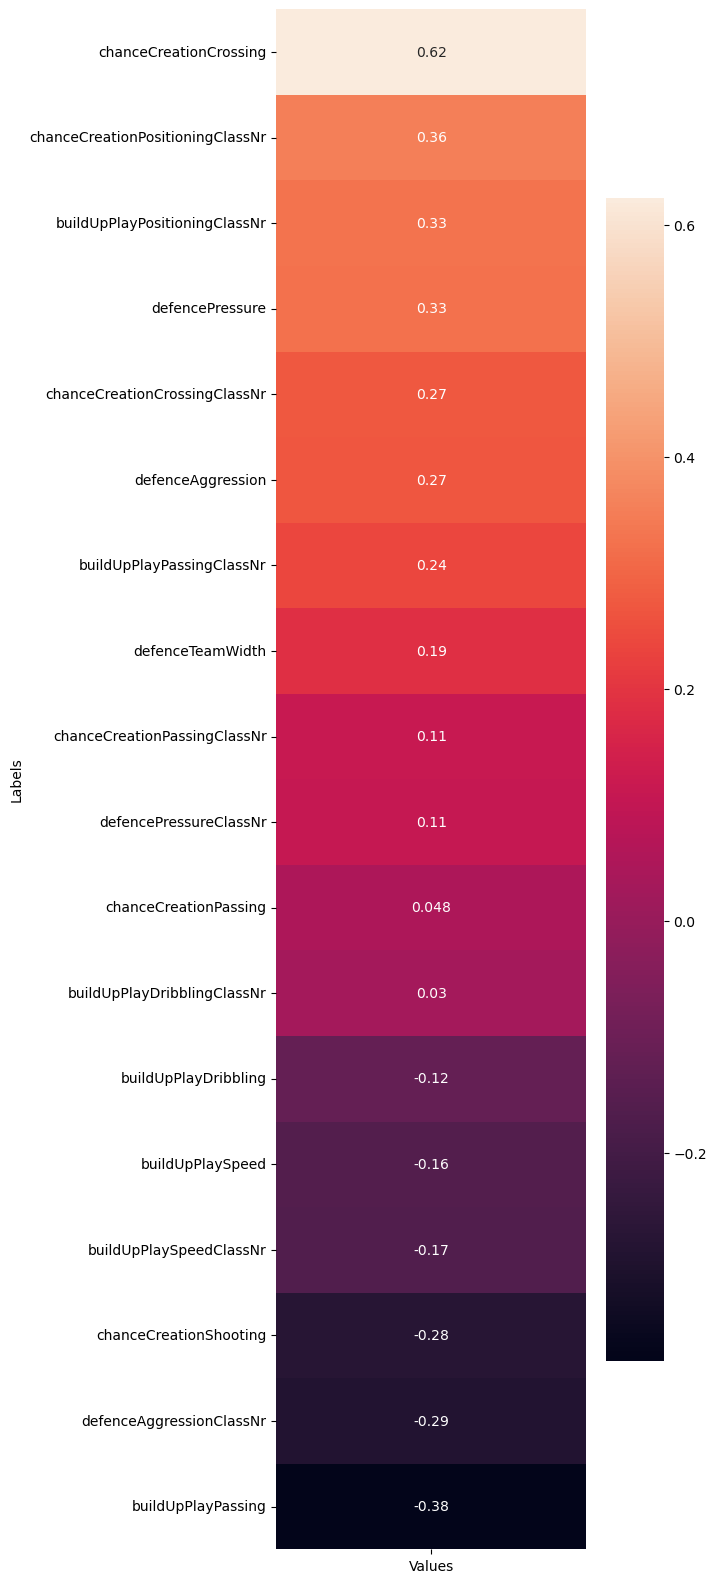

In [89]:
analyse.get_att_corr(fd.team_att_df, datetime.strptime("2013-01-01", "%Y-%m-%d"), datetime.strptime("2015-01-01", "%Y-%m-%d"))